In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install extra-keras-datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
from __future__ import print_function
import numpy as np 
from keras.datasets import mnist 
from extra_keras_datasets import emnist
from keras.utils import np_utils
np.random.seed(1671)  # for reproducibility
import tensorflow
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

**CHECKING ACCURACIES OF MODELS**

**MODEL 1 HAS CONV2D1(128 filters, (5,5) kernel size),CONV2D2(64 filters, (3,3) kernel size) Test accuracy=86.44%**

In [4]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

743915520/743900280 [==============================] - 7s 0us/step
X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [5]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [6]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [8]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

2022-02-07 10:56:55.484984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 10:56:55.569042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 10:56:55.569738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 10:56:55.570816: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

2022-02-07 10:56:59.262085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2


2022-02-07 10:57:00.613552: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


705/705 [==============================] - 12s 7ms/step - loss: 1.1518 - accuracy: 0.6587 - val_loss: 0.4601 - val_accuracy: 0.8395
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.6047 - accuracy: 0.8059 - val_loss: 0.3912 - val_accuracy: 0.8630
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4162 - accuracy: 0.8609

Test score: 0.4162449240684509
Test accuracy: 0.8608510494232178


In [10]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


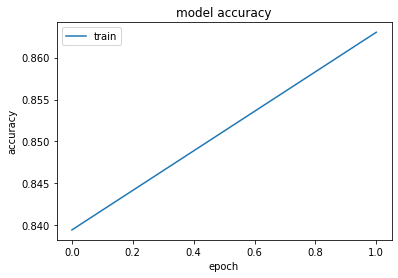

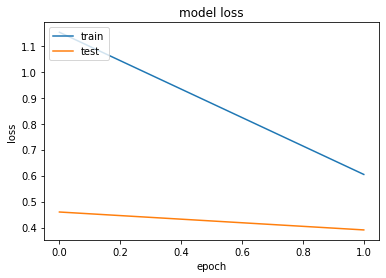

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**MODEL2 HAS CONV2D(32 filters, (3,3) kernel size) Test accuracy=85.29%**

In [12]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [13]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [14]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

In [17]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 1.2013 - accuracy: 0.6458 - val_loss: 0.4739 - val_accuracy: 0.8382
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.6140 - accuracy: 0.8028 - val_loss: 0.3887 - val_accuracy: 0.8605
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4127 - accuracy: 0.8604

Test score: 0.41270408034324646
Test accuracy: 0.8604255318641663


In [18]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


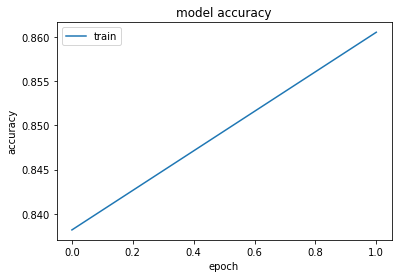

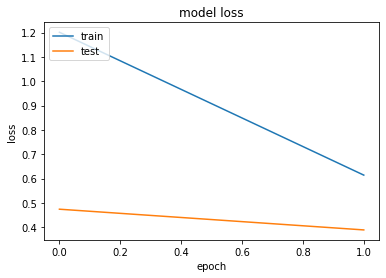

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(sample_rows, sample_columns, num_channels)))

# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))


model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(47, activation='softmax'))

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**CHECKING ACCURACIES FOR DIFFERENT BATCH SIZES**

**32**

In [20]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [21]:
#constant
BATCH_SIZE = 32
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [22]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [24]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [25]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
2820/2820 [==============================] - 12s 4ms/step - loss: 0.9574 - accuracy: 0.7130 - val_loss: 0.4278 - val_accuracy: 0.8502
Epoch 2/2
2820/2820 [==============================] - 11s 4ms/step - loss: 0.5773 - accuracy: 0.8199 - val_loss: 0.4082 - val_accuracy: 0.8578
Testing...
588/588 [==============================] - 2s 4ms/step - loss: 0.4376 - accuracy: 0.8571

Test score: 0.43763086199760437
Test accuracy: 0.8571276664733887


In [26]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


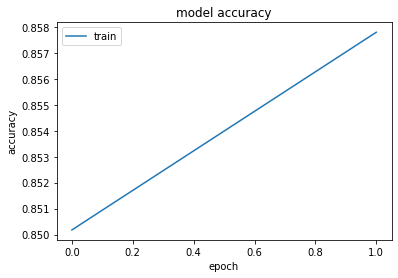

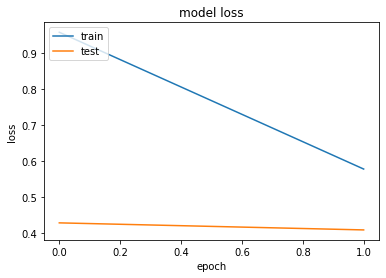

In [27]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**64**

In [28]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [29]:
#constant
BATCH_SIZE = 64
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [30]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [31]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [32]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [33]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
1410/1410 [==============================] - 8s 5ms/step - loss: 1.0530 - accuracy: 0.6871 - val_loss: 0.4473 - val_accuracy: 0.8445
Epoch 2/2
1410/1410 [==============================] - 7s 5ms/step - loss: 0.5740 - accuracy: 0.8152 - val_loss: 0.3878 - val_accuracy: 0.8643
Testing...
294/294 [==============================] - 1s 4ms/step - loss: 0.4163 - accuracy: 0.8624

Test score: 0.4163273572921753
Test accuracy: 0.8624467849731445


In [34]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


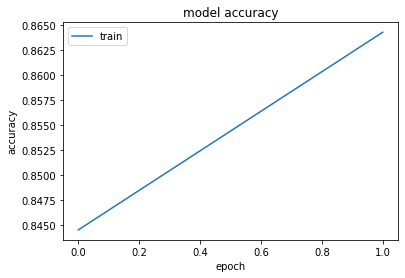

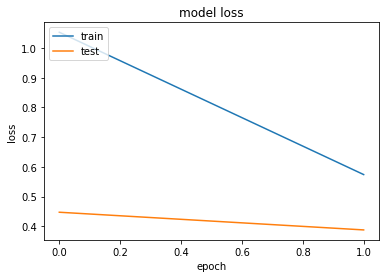

In [35]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**256**

In [36]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [37]:
#constant
BATCH_SIZE = 256
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [38]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [39]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [40]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [41]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
353/353 [==============================] - 5s 11ms/step - loss: 1.3429 - accuracy: 0.6092 - val_loss: 0.5304 - val_accuracy: 0.8230
Epoch 2/2
353/353 [==============================] - 4s 11ms/step - loss: 0.6671 - accuracy: 0.7866 - val_loss: 0.4175 - val_accuracy: 0.8525
Testing...
74/74 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.8509

Test score: 0.4439506232738495
Test accuracy: 0.8508510589599609


In [42]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


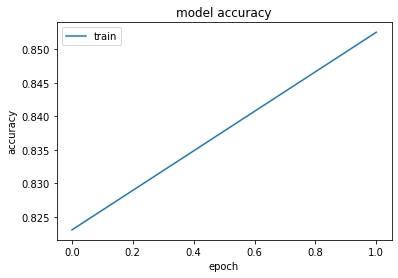

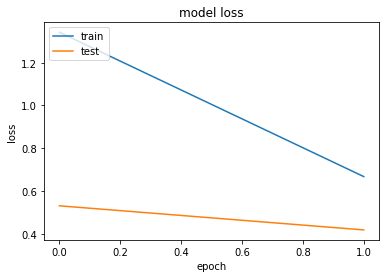

In [43]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**MODEL1 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.5**

* >**Batch size = 32  Accuracy = 85.468%**
* >**Batch size = 64  Accuracy = 85.446%**
* >**Batch size = 128 Accuracy = 86.44%**
* >**Batch size = 256 Accuracy = 84.76%**

**CHECKING ACCURACIES FOR DIFFERENT EPOCH SIZES W/ UPDATED MODEL1 AND BATCH_SIZE 128**

**10**

In [44]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [45]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 10
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [46]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [47]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [48]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [49]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/10
705/705 [==============================] - 6s 7ms/step - loss: 1.1622 - accuracy: 0.6562 - val_loss: 0.4656 - val_accuracy: 0.8370
Epoch 2/10
705/705 [==============================] - 5s 7ms/step - loss: 0.6051 - accuracy: 0.8047 - val_loss: 0.4148 - val_accuracy: 0.8531
Epoch 3/10
705/705 [==============================] - 5s 7ms/step - loss: 0.5134 - accuracy: 0.8328 - val_loss: 0.3721 - val_accuracy: 0.8650
Epoch 4/10
705/705 [==============================] - 5s 7ms/step - loss: 0.4688 - accuracy: 0.8479 - val_loss: 0.3608 - val_accuracy: 0.8704
Epoch 5/10
705/705 [==============================] - 5s 7ms/step - loss: 0.4459 - accuracy: 0.8542 - val_loss: 0.3641 - val_accuracy: 0.8715
Epoch 6/10
705/705 [==============================] - 5s 7ms/step - loss: 0.4390 - accuracy: 0.8577 - val_loss: 0.3582 - val_accuracy: 0.8713
Epoch 7/10
705/705 [==============================] - 5s 7ms/step - loss: 0.4291 - accuracy: 0.8616 - val_loss: 0.3826 - val_accuracy: 0.8759
Epoch 

In [50]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


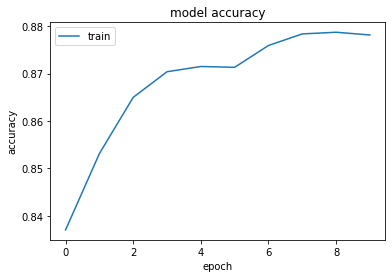

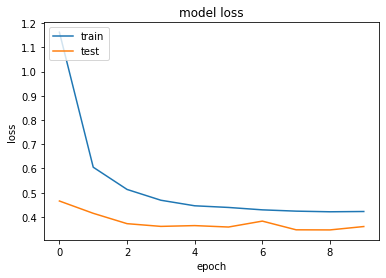

In [51]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**20**

In [52]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [53]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [54]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [55]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [56]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [57]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
705/705 [==============================] - 6s 7ms/step - loss: 1.1814 - accuracy: 0.6527 - val_loss: 0.4640 - val_accuracy: 0.8389
Epoch 2/20
705/705 [==============================] - 5s 7ms/step - loss: 0.6034 - accuracy: 0.8059 - val_loss: 0.3984 - val_accuracy: 0.8604
Epoch 3/20
705/705 [==============================] - 5s 7ms/step - loss: 0.5085 - accuracy: 0.8342 - val_loss: 0.3727 - val_accuracy: 0.8679
Epoch 4/20
705/705 [==============================] - 5s 7ms/step - loss: 0.4606 - accuracy: 0.8479 - val_loss: 0.3540 - val_accuracy: 0.8750
Epoch 5/20
705/705 [==============================] - 5s 8ms/step - loss: 0.4430 - accuracy: 0.8558 - val_loss: 0.3548 - val_accuracy: 0.8750
Epoch 6/20
705/705 [==============================] - 5s 7ms/step - loss: 0.4293 - accuracy: 0.8611 - val_loss: 0.3476 - val_accuracy: 0.8764
Epoch 7/20
705/705 [==============================] - 5s 7ms/step - loss: 0.4192 - accuracy: 0.8637 - val_loss: 0.4299 - val_accuracy: 0.8710
Epoch 

In [58]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


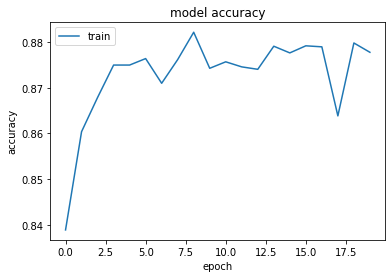

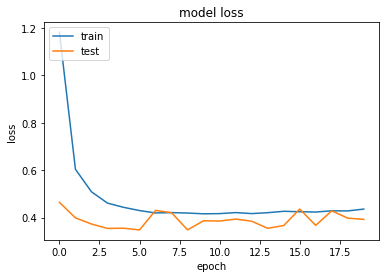

In [59]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**30**

In [60]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [61]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 30
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [62]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [63]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [64]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [65]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/30
705/705 [==============================] - 6s 7ms/step - loss: 1.1648 - accuracy: 0.6572 - val_loss: 0.4718 - val_accuracy: 0.8359
Epoch 2/30
705/705 [==============================] - 5s 7ms/step - loss: 0.6169 - accuracy: 0.8036 - val_loss: 0.3969 - val_accuracy: 0.8608
Epoch 3/30
705/705 [==============================] - 5s 7ms/step - loss: 0.5147 - accuracy: 0.8319 - val_loss: 0.3745 - val_accuracy: 0.8668
Epoch 4/30
705/705 [==============================] - 5s 7ms/step - loss: 0.4725 - accuracy: 0.8457 - val_loss: 0.3500 - val_accuracy: 0.8740
Epoch 5/30
705/705 [==============================] - 5s 7ms/step - loss: 0.4439 - accuracy: 0.8544 - val_loss: 0.3619 - val_accuracy: 0.8726
Epoch 6/30
705/705 [==============================] - 5s 7ms/step - loss: 0.4308 - accuracy: 0.8593 - val_loss: 0.3482 - val_accuracy: 0.8766
Epoch 7/30
705/705 [==============================] - 6s 8ms/step - loss: 0.4239 - accuracy: 0.8624 - val_loss: 0.3545 - val_accuracy: 0.8758
Epoch 

In [66]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


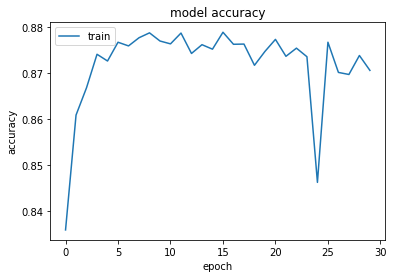

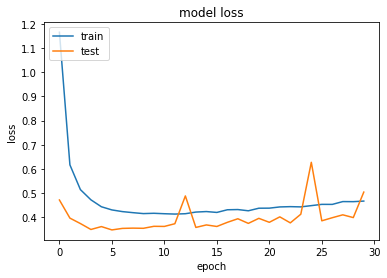

In [67]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**40**

In [68]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [69]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [70]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [71]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [72]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [73]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/40
705/705 [==============================] - 6s 7ms/step - loss: 1.1494 - accuracy: 0.6613 - val_loss: 0.4656 - val_accuracy: 0.8400
Epoch 2/40
705/705 [==============================] - 5s 7ms/step - loss: 0.5958 - accuracy: 0.8088 - val_loss: 0.4093 - val_accuracy: 0.8575
Epoch 3/40
705/705 [==============================] - 5s 7ms/step - loss: 0.4984 - accuracy: 0.8374 - val_loss: 0.3734 - val_accuracy: 0.8673
Epoch 4/40
705/705 [==============================] - 5s 7ms/step - loss: 0.4597 - accuracy: 0.8500 - val_loss: 0.3735 - val_accuracy: 0.8667
Epoch 5/40
705/705 [==============================] - 5s 7ms/step - loss: 0.4337 - accuracy: 0.8573 - val_loss: 0.3630 - val_accuracy: 0.8718
Epoch 6/40
705/705 [==============================] - 5s 7ms/step - loss: 0.4210 - accuracy: 0.8622 - val_loss: 0.3542 - val_accuracy: 0.8750
Epoch 7/40
705/705 [==============================] - 5s 7ms/step - loss: 0.4174 - accuracy: 0.8661 - val_loss: 0.3632 - val_accuracy: 0.8759
Epoch 

In [74]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


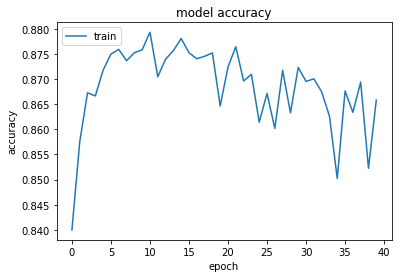

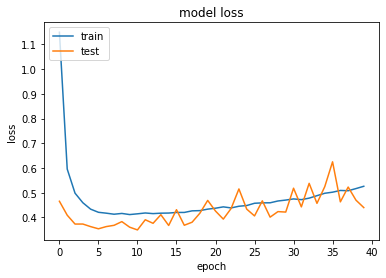

In [75]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**50**

In [76]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [77]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 50
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [78]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [79]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [80]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [81]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/50
705/705 [==============================] - 6s 7ms/step - loss: 1.2121 - accuracy: 0.6445 - val_loss: 0.4829 - val_accuracy: 0.8301
Epoch 2/50
705/705 [==============================] - 5s 7ms/step - loss: 0.6178 - accuracy: 0.8016 - val_loss: 0.4134 - val_accuracy: 0.8560
Epoch 3/50
705/705 [==============================] - 5s 7ms/step - loss: 0.5259 - accuracy: 0.8282 - val_loss: 0.3714 - val_accuracy: 0.8680
Epoch 4/50
705/705 [==============================] - 5s 7ms/step - loss: 0.4799 - accuracy: 0.8435 - val_loss: 0.3606 - val_accuracy: 0.8707
Epoch 5/50
705/705 [==============================] - 5s 7ms/step - loss: 0.4544 - accuracy: 0.8519 - val_loss: 0.3875 - val_accuracy: 0.8686
Epoch 6/50
705/705 [==============================] - 5s 7ms/step - loss: 0.4358 - accuracy: 0.8573 - val_loss: 0.3535 - val_accuracy: 0.8730
Epoch 7/50
705/705 [==============================] - 5s 7ms/step - loss: 0.4275 - accuracy: 0.8615 - val_loss: 0.3483 - val_accuracy: 0.8758
Epoch 

In [82]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


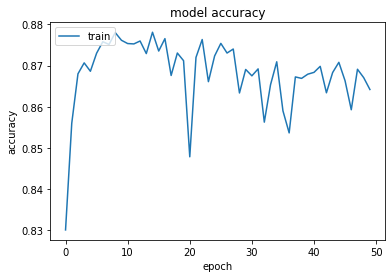

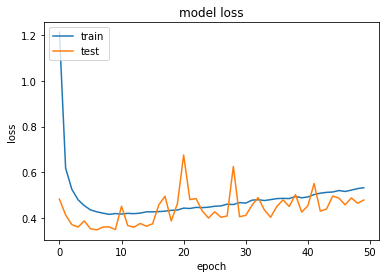

In [83]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.5**

* >**Epochs = 2  Test Accuracy = 86.44%**
* >**Epochs = 10 Test Accuracy = 87.96%**
* >**Epochs = 20 Test Accuracy = 87.19%** 
* >**Epochs = 30 Test Accuracy = 86.64%**
* >**Epochs = 40 Test Accuracy = 84.77%**
* >**Epochs = 50 Test Accuracy = 85.42%**

**CHECKING ACCURACIES FOR DIFFERENT VALIDATION_SPLIT**

**0.1**

In [84]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [85]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.1
OPTIM = RMSprop()

In [86]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [87]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [88]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)             

In [89]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
794/794 [==============================] - 6s 8ms/step - loss: 1.0586 - accuracy: 0.6842 - val_loss: 0.5170 - val_accuracy: 0.8213
Epoch 2/2
794/794 [==============================] - 5s 6ms/step - loss: 0.5720 - accuracy: 0.8147 - val_loss: 0.4137 - val_accuracy: 0.8504
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4313 - accuracy: 0.8495

Test score: 0.43125706911087036
Test accuracy: 0.849521279335022


In [90]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


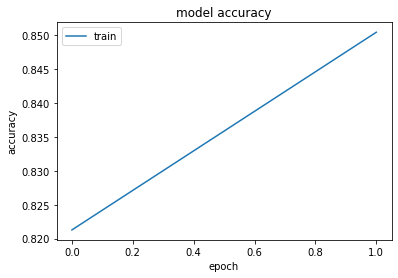

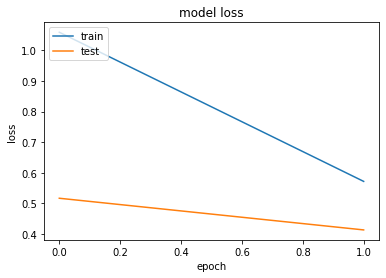

In [91]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.3**

In [92]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [93]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.3
OPTIM = RMSprop()

In [94]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [95]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [96]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)             

In [97]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
617/617 [==============================] - 5s 8ms/step - loss: 1.2919 - accuracy: 0.6247 - val_loss: 0.5191 - val_accuracy: 0.8270
Epoch 2/2
617/617 [==============================] - 5s 8ms/step - loss: 0.6508 - accuracy: 0.7919 - val_loss: 0.4371 - val_accuracy: 0.8472
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4590 - accuracy: 0.8449

Test score: 0.4590160548686981
Test accuracy: 0.8448936343193054


In [98]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


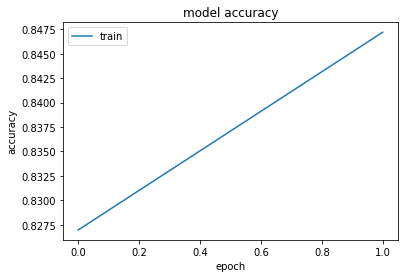

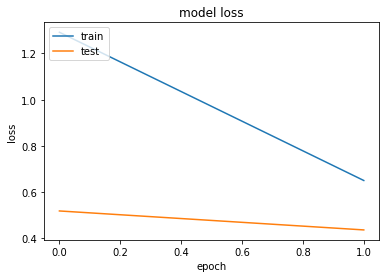

In [99]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.4**

In [100]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [101]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.4
OPTIM = RMSprop()

In [102]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [103]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [104]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)             

In [105]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
529/529 [==============================] - 5s 9ms/step - loss: 1.3099 - accuracy: 0.6176 - val_loss: 0.5166 - val_accuracy: 0.8274
Epoch 2/2
529/529 [==============================] - 4s 8ms/step - loss: 0.6706 - accuracy: 0.7844 - val_loss: 0.4237 - val_accuracy: 0.8541
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4517 - accuracy: 0.8494

Test score: 0.4517393112182617
Test accuracy: 0.8494148850440979


In [106]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


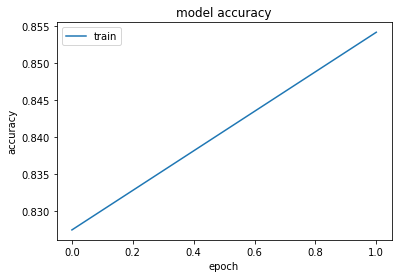

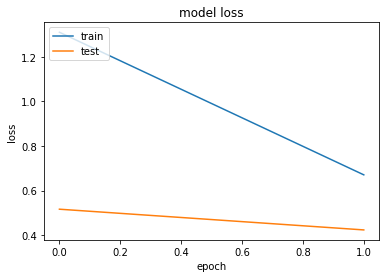

In [107]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.5**

In [108]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [109]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.5
OPTIM = RMSprop()

In [110]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [111]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [112]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)             

In [113]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
441/441 [==============================] - 5s 11ms/step - loss: 1.3899 - accuracy: 0.6001 - val_loss: 0.5532 - val_accuracy: 0.8165
Epoch 2/2
441/441 [==============================] - 4s 10ms/step - loss: 0.6992 - accuracy: 0.7764 - val_loss: 0.4442 - val_accuracy: 0.8491
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4624 - accuracy: 0.8451

Test score: 0.46237799525260925
Test accuracy: 0.8451063632965088


In [114]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


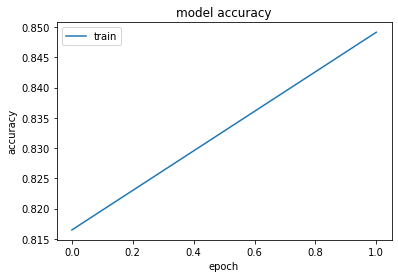

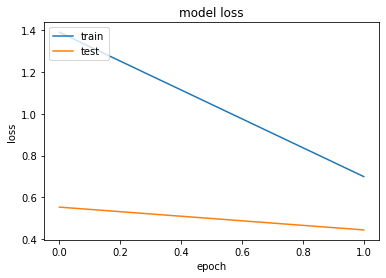

In [115]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.5**

* > **Validation_split = 0.1 Test Accuracy = 84.18%**
* > **Validation_split = 0.2 Test Accuracy = 86.44%**
* > **Validation_split = 0.3 Test Accuracy = 85.57**
* > **Validation_split = 0.4 Test Accuracy = 84.84**
* > **Validation_split = 0.5 Test Accuracy = 84.43**

**ACCURACIES FOR DIFFERENT OPTIMS WITH MODEL1, BATCH_SIZE=128, VALIDATION_SPLIT=0.2 EPOCH=2**

**Adam()**

In [116]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [117]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

In [118]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [119]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [120]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)             

In [121]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 5s 7ms/step - loss: 1.2963 - accuracy: 0.6160 - val_loss: 0.4917 - val_accuracy: 0.8304
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.6794 - accuracy: 0.7806 - val_loss: 0.4055 - val_accuracy: 0.8568
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4272 - accuracy: 0.8559

Test score: 0.4272310435771942
Test accuracy: 0.8558510541915894


In [122]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


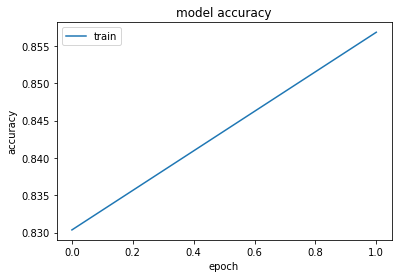

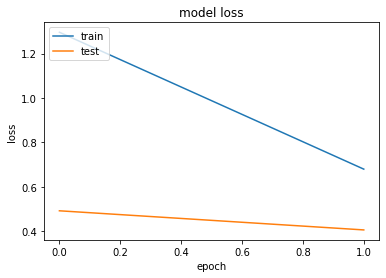

In [123]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**SGD()**

In [124]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [125]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = SGD()

In [126]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [127]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [128]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)             

In [129]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 5s 7ms/step - loss: 3.3911 - accuracy: 0.1341 - val_loss: 2.0277 - val_accuracy: 0.5162
Epoch 2/2
705/705 [==============================] - 5s 6ms/step - loss: 2.0703 - accuracy: 0.4229 - val_loss: 1.3179 - val_accuracy: 0.6443
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 1.3380 - accuracy: 0.6432

Test score: 1.338032841682434
Test accuracy: 0.6432446837425232


In [130]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


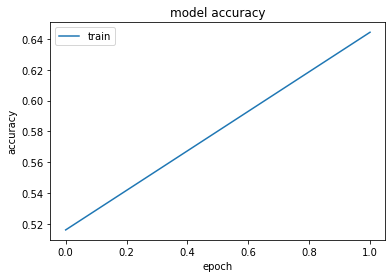

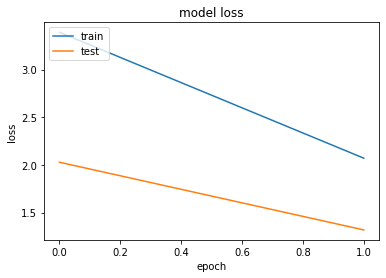

In [131]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 Dropout=0.5**

* >**RMSprop() Test accuracy = 86.44%**
* >**Adam()    Test accuracy = 85.71%**
* >**SGD()     Test accuracy = 64.27%**

**CHECKING ACCURACIES FOR DIFFERENT DROPOUT SIZES**

**0.1**

In [132]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [133]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [134]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [135]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [136]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)             

In [137]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 0.8492 - accuracy: 0.7415 - val_loss: 0.4656 - val_accuracy: 0.8371
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.4272 - accuracy: 0.8539 - val_loss: 0.3887 - val_accuracy: 0.8598
Testing...
147/147 [==============================] - 1s 5ms/step - loss: 0.4073 - accuracy: 0.8600

Test score: 0.40726733207702637
Test accuracy: 0.8600000143051147


In [138]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


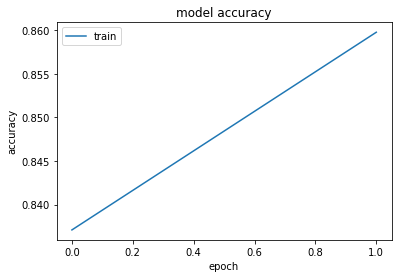

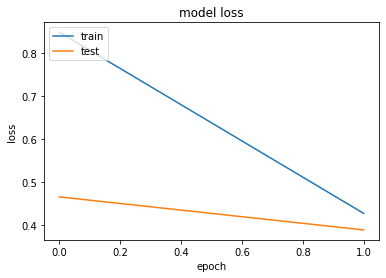

In [139]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.2**

In [140]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [141]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [142]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [143]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [144]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)             

In [145]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 0.8649 - accuracy: 0.7367 - val_loss: 0.4776 - val_accuracy: 0.8423
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.4441 - accuracy: 0.8502 - val_loss: 0.3805 - val_accuracy: 0.8652
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.3997 - accuracy: 0.8620

Test score: 0.39971405267715454
Test accuracy: 0.8619681000709534


In [146]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


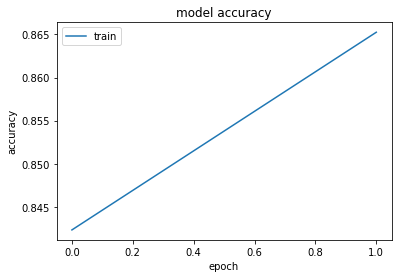

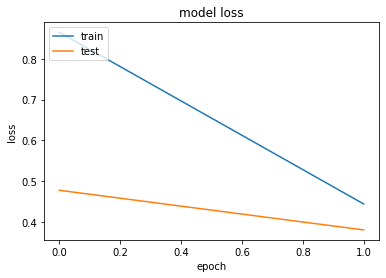

In [147]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.3**

In [148]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [149]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [150]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [151]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [152]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)             

In [153]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 0.9807 - accuracy: 0.7077 - val_loss: 0.4675 - val_accuracy: 0.8381
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.5021 - accuracy: 0.8345 - val_loss: 0.3802 - val_accuracy: 0.8645
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4050 - accuracy: 0.8612

Test score: 0.40496018528938293
Test accuracy: 0.86117023229599


In [154]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


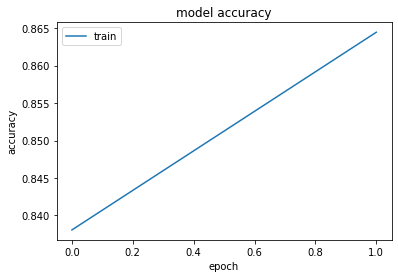

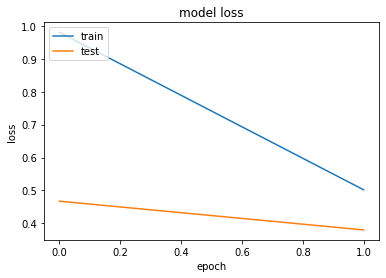

In [155]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.4**

In [156]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [157]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [158]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [159]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [160]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)             

In [161]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 1.0602 - accuracy: 0.6852 - val_loss: 0.4445 - val_accuracy: 0.8443
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.5402 - accuracy: 0.8250 - val_loss: 0.3888 - val_accuracy: 0.8586
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4107 - accuracy: 0.8593

Test score: 0.41068848967552185
Test accuracy: 0.8593084812164307


In [162]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


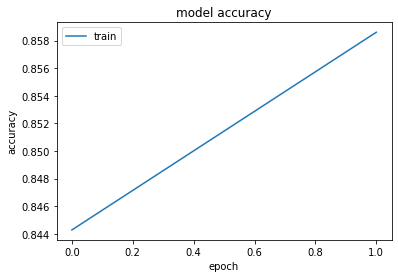

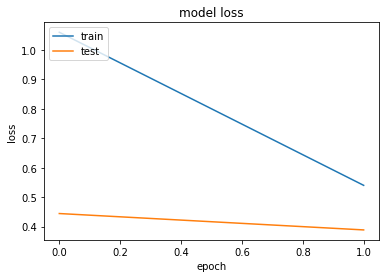

In [163]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.6**

In [164]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [165]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [166]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [167]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [168]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.6))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)             

In [169]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 1.3131 - accuracy: 0.6134 - val_loss: 0.4819 - val_accuracy: 0.8344
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.6810 - accuracy: 0.7857 - val_loss: 0.4027 - val_accuracy: 0.8566
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4277 - accuracy: 0.8547

Test score: 0.42768821120262146
Test accuracy: 0.8547340631484985


In [170]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


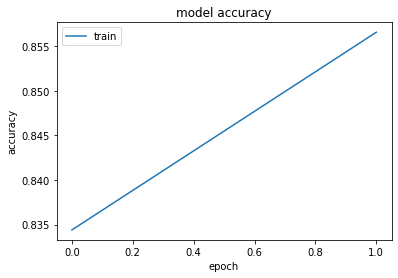

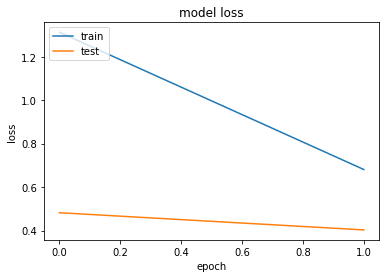

In [171]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.7**

In [172]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [173]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [174]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [175]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [176]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.7))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)             

In [177]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 1.5855 - accuracy: 0.5434 - val_loss: 0.5033 - val_accuracy: 0.8291
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 0.8613 - accuracy: 0.7317 - val_loss: 0.4299 - val_accuracy: 0.8499
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.4571 - accuracy: 0.8465

Test score: 0.4570978283882141
Test accuracy: 0.8464893698692322


In [178]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


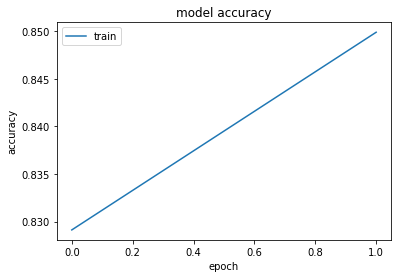

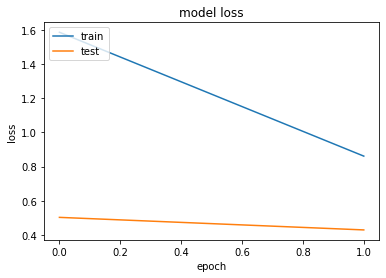

In [179]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.8**

In [180]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [181]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [182]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [183]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [184]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)             

In [185]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 2.0411 - accuracy: 0.4160 - val_loss: 0.5989 - val_accuracy: 0.8151
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 1.2056 - accuracy: 0.6249 - val_loss: 0.4880 - val_accuracy: 0.8364
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.5115 - accuracy: 0.8366

Test score: 0.5115305781364441
Test accuracy: 0.8366489410400391


In [186]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


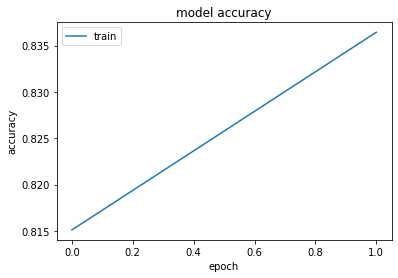

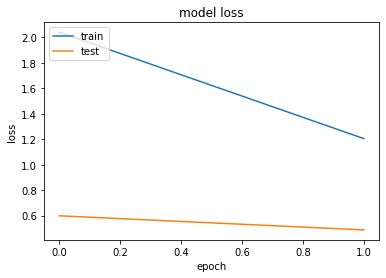

In [187]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**0.9**

In [188]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [189]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [190]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [191]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [192]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.9))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)             

In [193]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 6s 7ms/step - loss: 2.8280 - accuracy: 0.2111 - val_loss: 1.0213 - val_accuracy: 0.7827
Epoch 2/2
705/705 [==============================] - 5s 7ms/step - loss: 2.0415 - accuracy: 0.3664 - val_loss: 0.6447 - val_accuracy: 0.8135
Testing...
147/147 [==============================] - 1s 4ms/step - loss: 0.6653 - accuracy: 0.8131

Test score: 0.6653403639793396
Test accuracy: 0.8131383061408997


In [194]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


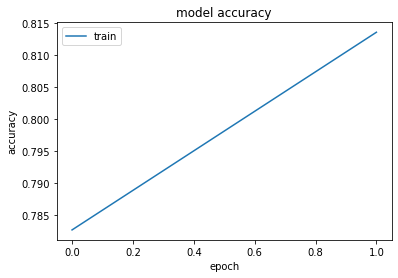

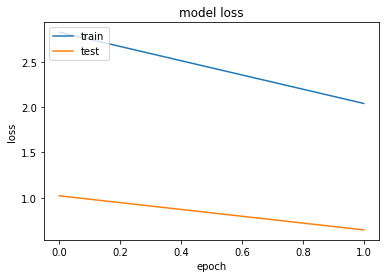

In [195]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop()**

* >**Dropout=0.1 Test Accuracy=86.68%**
* >**Dropout=0.2 Test Accuracy=86.42%**
* >**Dropout=0.3 Test Accuracy=86.10%**
* >**Dropout=0.4 Test Accuracy=85.64%**
* >**Dropout=0.5 Test Accuracy=86.44%**
* >**Dropout=0.6 Test Accuracy=85.60%**
* >**Dropout=0.7 Test Accuracy=84.55**
* >**Dropout=0.8 Test Accuracy=83.30%**
* >**Dropout=0.9 Test Accuracy=80.79%**

**FINAL MODEL > CONV2D1(128 filters, (5,5) kernel size),CONV2D2(64 filters, (3,3) kernel size) 128 BATCH SIZE 10 EPOCH VALIDATION_SPLIT=0.2 RMSprop() Dropout=0.1**

In [196]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [197]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 10
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [198]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [199]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [200]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)             

In [201]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/10
705/705 [==============================] - 6s 7ms/step - loss: 0.8230 - accuracy: 0.7466 - val_loss: 0.4312 - val_accuracy: 0.8503
Epoch 2/10
705/705 [==============================] - 5s 7ms/step - loss: 0.4245 - accuracy: 0.8546 - val_loss: 0.3763 - val_accuracy: 0.8687
Epoch 3/10
705/705 [==============================] - 5s 7ms/step - loss: 0.3550 - accuracy: 0.8750 - val_loss: 0.3424 - val_accuracy: 0.8764
Epoch 4/10
705/705 [==============================] - 5s 7ms/step - loss: 0.3187 - accuracy: 0.8870 - val_loss: 0.3342 - val_accuracy: 0.8795
Epoch 5/10
705/705 [==============================] - 5s 7ms/step - loss: 0.2911 - accuracy: 0.8953 - val_loss: 0.3447 - val_accuracy: 0.8767
Epoch 6/10
705/705 [==============================] - 5s 7ms/step - loss: 0.2708 - accuracy: 0.9019 - val_loss: 0.3390 - val_accuracy: 0.8795
Epoch 7/10
705/705 [==============================] - 5s 8ms/step - loss: 0.2544 - accuracy: 0.9065 - val_loss: 0.3468 - val_accuracy: 0.8827
Epoch 

In [202]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


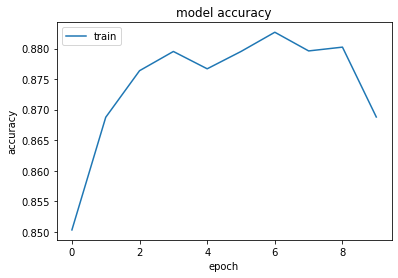

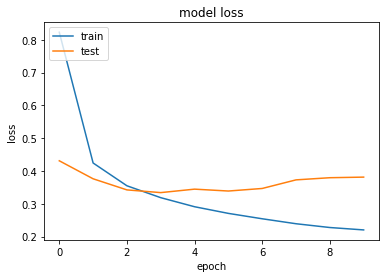

In [203]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [204]:
Model1="2CONV2Ds128filters5kernel"
Model2="Batch_size_128" 
Model3="Epoch10"  
Model4="Validation_split_0.2"
Model5="OPTIM=RMSprop()"
Model6="Dropout0.1"
Model7="FINAL" 

Train_accuracy1=85.60
Train_accuracy2=85.60
Train_accuracy3=87.59
Train_accuracy4=85.60
Train_accuracy5=85.60
Train_accuracy6=86.62
Train_accuracy7=87.82

Validation_accuracy1=85.96
Validation_accuracy2=85.96
Validation_accuracy3=87.73
Validation_accuracy4=85.96
Validation_accuracy5=85.96
Validation_accuracy6=86.59
Validation_accuracy7=87.58

Test_accuracy1=86.44 
Test_accuracy2=86.44
Test_accuracy3=87.85
Test_accuracy4=86.44
Test_accuracy5=86.44
Test_accuracy6=86.68
Test_accuracy7=87.82

In [205]:
info = {'SNO.':[1,2,3,4,5,6,7],'Model':[Model1,Model2,Model3,Model4,Model5,Model6,Model7], 'Train accuracy':[Train_accuracy1,Train_accuracy2,Train_accuracy3,Train_accuracy4,Train_accuracy5,Train_accuracy6,Train_accuracy7], 'Validation accuracy':[Validation_accuracy1,Validation_accuracy2,Validation_accuracy3,Validation_accuracy4,Validation_accuracy5,Validation_accuracy6,Validation_accuracy7],'Test accuracy':[Test_accuracy1,Test_accuracy2,Test_accuracy3,Test_accuracy4,Test_accuracy5,Test_accuracy6,Test_accuracy7]}

In [206]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [207]:
from tabulate import tabulate

In [208]:
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=range(1,8)))

╒════╤════════╤═══════════════════════════╤══════════════════╤═══════════════════════╤═════════════════╕
│    │   SNO. │ Model                     │   Train accuracy │   Validation accuracy │   Test accuracy │
╞════╪════════╪═══════════════════════════╪══════════════════╪═══════════════════════╪═════════════════╡
│  1 │      1 │ 2CONV2Ds128filters5kernel │            85.6  │                 85.96 │           86.44 │
├────┼────────┼───────────────────────────┼──────────────────┼───────────────────────┼─────────────────┤
│  2 │      2 │ Batch_size_128            │            85.6  │                 85.96 │           86.44 │
├────┼────────┼───────────────────────────┼──────────────────┼───────────────────────┼─────────────────┤
│  3 │      3 │ Epoch10                   │            87.59 │                 87.73 │           87.85 │
├────┼────────┼───────────────────────────┼──────────────────┼───────────────────────┼─────────────────┤
│  4 │      4 │ Validation_split_0.2      │            

In [ ]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

In [ ]:
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
